In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [24]:
car_dataset = pd.read_csv(r'D:\Users\DELL\Downloads\CAR DETAILS FROM CAR DEKHO.csv')

In [25]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [26]:
car_dataset.shape

(4340, 8)

In [27]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 271.4+ KB


In [28]:
#checking for missing data
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [29]:
car_dataset.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner             int64
dtype: object

In [30]:
car_dataset['owner'] = car_dataset['owner'].astype(float)

In [31]:
#to know about data distribution
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
1.0    2832
2.0    1106
3.0     304
4.0      81
0.0      17
Name: owner, dtype: int64


In [32]:
#encoding the text into numerical values as the model will understand numerical values better 
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

car_dataset.replace({'transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [33]:
#Splitting the data and Target
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [10]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      1
1     2007      50000     0            1             0      1
2     2012     100000     1            1             0      1
3     2017      46000     0            1             0      1
4     2014     141000     1            1             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      2
4336  2014      80000     1            1             0      2
4337  2009      83000     0            1             0      2
4338  2016      90000     1            1             0      1
4339  2016      40000     0            1             0      1

[4340 rows x 6 columns]


In [34]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [67]:
lin_reg_model = LinearRegression()

In [68]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [69]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [70]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4248439079932885


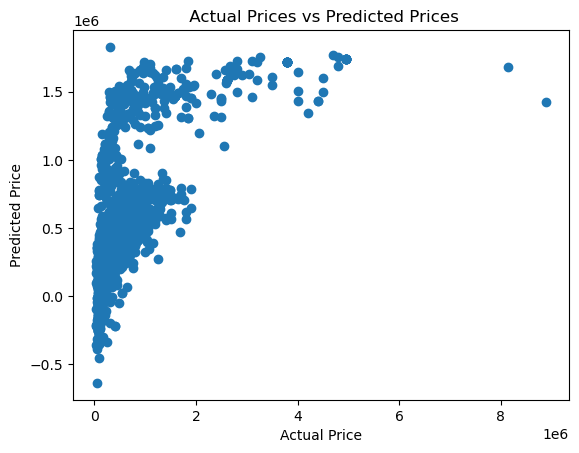

In [83]:
#visualising the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [72]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [73]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4671577433644004


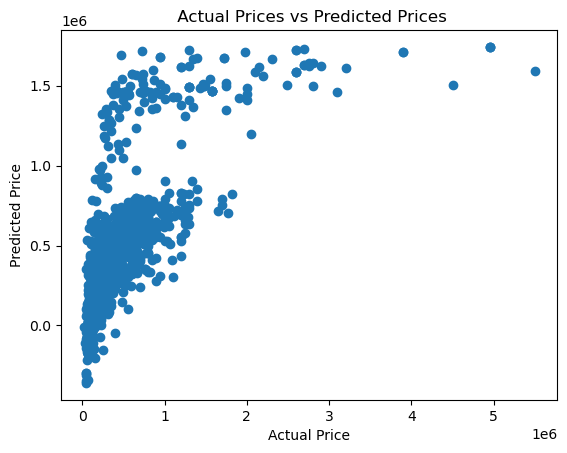

In [74]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [75]:
#using lasso regression
lass_reg_model = Lasso()

In [76]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [77]:
training_data_prediction = lass_reg_model.predict(X_train)

In [78]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4671577433644004


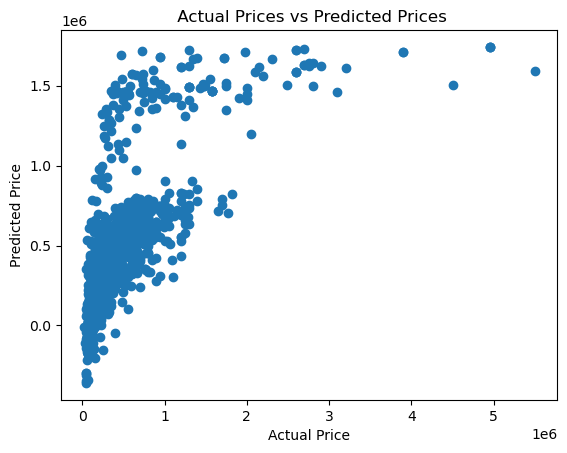

In [79]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()